In [1]:
import scipy.stats as stats
import geopandas as gpd
import numpy as np
from numpy import arange
from fs import methods as m
from fs import model as ml
import ipywidgets as widgets
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from IPython.core.display import display, clear_output
from sklearn import preprocessing
import os
from sklearn.preprocessing import MinMaxScaler
from ipywidgets import AppLayout, Layout
from shapely.geometry import Point, Polygon


RESOLUTION= '0_1'

geopackages = os.listdir('grids_'+RESOLUTION)


35 112
35 112
35 112
35 112
35 112


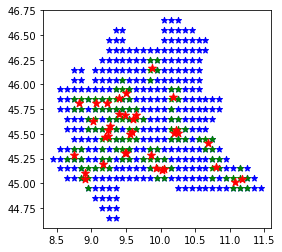

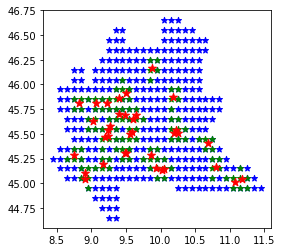

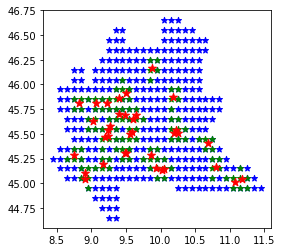

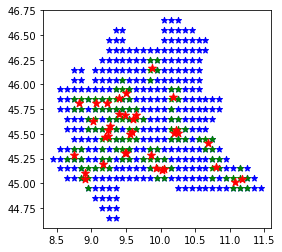

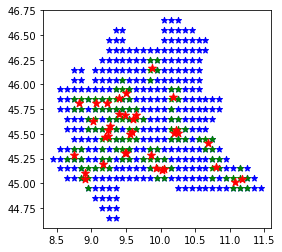

In [2]:
for grid in geopackages:
    
    data = gpd.read_file('grids_'+RESOLUTION+'/'+ grid)
    points_st = gpd.read_file('arpa_stations/pm25_st.gpkg')

    data_filtered = data[data['pm25_st'].isnull()]

    results = m.add_buffer(points_st, data, data, 5)
    results = results[~results['pm25_st'].isnull()].dropna(axis=1)

    
    
    centr_filtered = data_filtered[['lng_cen','lat_cen']]
    geometry_filtered = [Point(xy) for xy in zip(data_filtered['lng_cen'], data_filtered['lat_cen'])]

    cent_filtered_df = gpd.GeoDataFrame(centr_filtered,
                              crs = "EPSG:4326",
                              geometry = geometry_filtered)
    ax = cent_filtered_df.plot(marker='*', color='blue', markersize=40);
    
    centr_st = points_st['geometry']

    cent_st_df = gpd.GeoDataFrame(centr_st,
                              crs = "EPSG:4326",
                              geometry = centr_st)

    print(points_st.shape[0], results.shape[0])

    centr_results = results[['lng_cen','lat_cen']]
    geometry_results = [Point(xy) for xy in zip(results['lng_cen'], results['lat_cen'])]

    results_df = gpd.GeoDataFrame(centr_results,
                              crs = "EPSG:4326",
                              geometry = geometry_results)
    results_df.plot(ax=ax, marker='*', color='green', markersize=40);
    cent_st_df.plot(ax = ax, marker='*', color='red', markersize=70, legend=True);

    
    
    

## 